In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
CarData = pd.read_csv('CarPrice_Assignment.csv')

In [4]:
df=pd.DataFrame(CarData)
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [5]:
### Droping CarName
df=df.drop(['CarName'],axis=1)

In [6]:
df=df.drop(['cylindernumber'],axis=1)
df.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
### Droping fuelsystem
df=df.drop(['fuelsystem'],axis=1)

In [8]:
dummies = {}
for feat in ['carbody','drivewheel','enginelocation','enginetype','fueltype','symboling','aspiration']:
    dummies[feat] = pd.get_dummies(df[feat],drop_first=True)

In [9]:
for feat in dummies.keys():
    df.drop(feat,axis=1,inplace=True)
    df = pd.concat([df,dummies[feat]],axis=1)

In [10]:
def doornumber_int(x):
    units = {"zero":0, "one":1, "two":2, "three":3, "four":4, "five":5, "six":6, "seven":7, "eight":8,"nine":9, "ten":10, "eleven":11, "twelve":12 }
    return units[x]

In [11]:
df.doornumber=df.doornumber.apply(doornumber_int)
df.head(3)

,car_ID,doornumber,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,ohcf,ohcv,rotor,gas,-1,0,1,2,3,turbo
0,1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,0,1,0
1,2,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,0,0,0,1,0,0,0,0,1,0
2,3,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0,1,0,1,0,0,1,0,0,0


In [12]:
### Check that all columns of final DataFrame are Numeric 
df.dtypes

car_ID                int64
doornumber            int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginesize            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
hardtop               uint8
hatchback             uint8
sedan                 uint8
wagon                 uint8
fwd                   uint8
rwd                   uint8
rear                  uint8
dohcv                 uint8
l                     uint8
ohc                   uint8
ohcf                  uint8
ohcv                  uint8
rotor                 uint8
gas                   uint8
-1                    uint8
0                     uint8
1                     uint8
2                     uint8
3                     uint8
turbo               

In [13]:
X=df.drop(['price'],axis=1)
y=df.price

In [14]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
sc_values = sc.fit_transform(X)
X = pd.DataFrame(sc_values,columns=X.columns)

In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [16]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(X_train,y_train)

LinearRegression()

In [17]:
y_pred = regressor.predict(X_test)

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)

In [18]:
print("Linear Regression Score : ",score)

Linear Regression Score :  0.8227279085027038


In [19]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100,200],'selection':['random']}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X_train,y_train)

lasso_pred=lasso_regressor.predict(X_test)

In [20]:
from sklearn.metrics import r2_score
score_lasso=r2_score(y_test,lasso_pred)


print("Lasso Score : ",score_lasso)

Lasso Score :  0.8230891986188126


In [21]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train,y_train)

ridge_pred=ridge_regressor.predict(X_test)

from sklearn.metrics import r2_score
score_ridge=r2_score(y_test,ridge_pred)


print("Ridge Score : ",score_ridge)

Ridge Score :  0.8264032572270685


[Text(0.5, 1.0, 'Ridge Regression')]

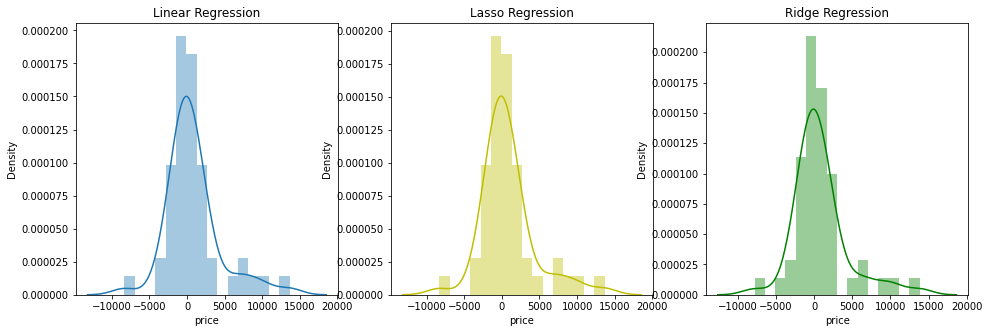

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(ncols=3,figsize=(16,5))

sns.distplot(y_test-y_pred,ax=axs[0]).set(title='Linear Regression')
sns.distplot(y_test-lasso_pred,ax=axs[1],color="y").set(title='Lasso Regression')
sns.distplot(y_test-ridge_pred,ax=axs[2],color="g").set(title='Ridge Regression')

In [23]:
print("Linear Regression Score : ",score)
print("Lasso Score : ",score_lasso)
print("Ridge Score : ",score_ridge)

Linear Regression Score :  0.8227279085027038
Lasso Score :  0.8230891986188126
Ridge Score :  0.8264032572270685


In [24]:
pd.options.display.float_format = '{:,.4f}'.format
score_df = pd.DataFrame({'Regressor':['Linear Regression','Lasso Regressor','Ridge Regressor'],'Score':[score,score_lasso,score_ridge]})
score_df

,Regressor,Score
0,Linear Regression,0.8227
1,Lasso Regressor,0.8231
2,Ridge Regressor,0.8264


In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                'normalize': [True, False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random'],
                'max_depth':[10,15,20,25]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(X,y)

,model,best_score,best_params
0,linear_regression,0.8364,{'normalize': True}
1,lasso,0.8440,"{'alpha': 2, 'selection': 'random'}"
2,decision_tree,0.8973,"{'criterion': 'mse', 'max_depth': 25, 'splitte..."


In [26]:
score_df

,Regressor,Score
0,Linear Regression,0.8227
1,Lasso Regressor,0.8231
2,Ridge Regressor,0.8264
